# Laboratorul 2

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice as sd
import math

## Exercițiul 1

Generați un semnal sinusoidal folosind funcția sinus (`np.sin`) cu o amplitudine, frecvență și fază aleasă de voi. Generați apoi un semnal folosind funcția cosinus (`np.cos`) astfel încât, pe orizontul de timp ales, acesta să fie identic cu semnalul sinus. Verificați afișându-le grafic în două subplot-uri diferite.

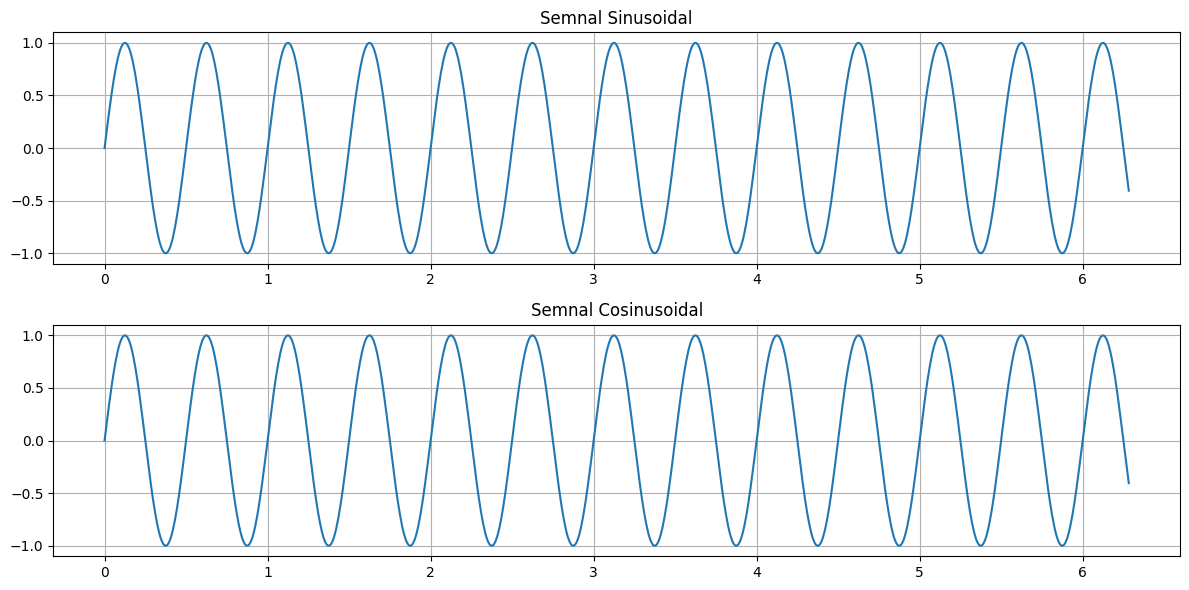

In [18]:
amplitude = 1
frequency = 2
faza_sin = 0  
faza_cos = np.pi / 2  # decalajul dintre sin si cos e pi/2
time_interval = np.linspace(0, 2*np.pi, 1000)  # timp pentru a avea cerc complet0 to 2*pi

 
sin_signal = amplitude * np.sin(2 * np.pi * frequency * time_interval + faza_sin)
cos_signal = amplitude * np.cos(2 * np.pi * frequency * time_interval - faza_cos)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("Semnal Sinusoidal")
plt.plot(time_interval, sin_signal)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title("Semnal Cosinusoidal")
plt.plot(time_interval, cos_signal)
plt.grid(True)

plt.tight_layout()
plt.show()

## Exercițiul 2

Generați un semnal sinusoidal de amplitudine egală cu 1 și cu o frecvență aleasă de voi. Încercați 4 valori diferite pentru fază. Afișați toate semnalele pe același grafic.

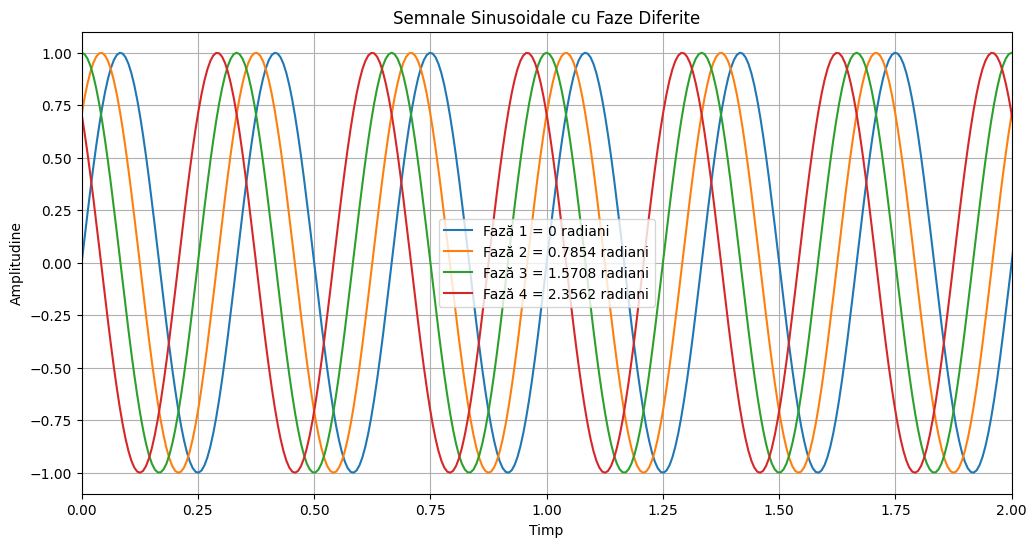

In [22]:
amplitude = 1
frequency = 3  
time_interval = np.linspace(0, 2*np.pi, 1000)  


phases = [0, np.pi/4, np.pi/2, 3*np.pi/4]

plt.figure(figsize=(12, 6))
plt.title("Semnale Sinusoidale cu Faze Diferite")
plt.xlabel("Timp")
plt.ylabel("Amplitudine")

for idx, phase in enumerate(phases):
    signal = amplitude * np.sin(2 * np.pi * frequency * time_interval + phase)
    plt.plot(time_interval, signal, label=f"Faza  {idx+1} = {round(phase, 4)} radiani")

plt.grid(True)
plt.xlim([0, 2])
plt.legend()
plt.show()


## Exercițiul 3

Generați două semnale cu forme de undă diferite (ex. unul sinusoidal, celălalt sawtooth) pe același orizont de timp și adunațile eșantioanele. Afișați grafic cele două semnale inițiale și suma lor, fiecare în câte un subplot.

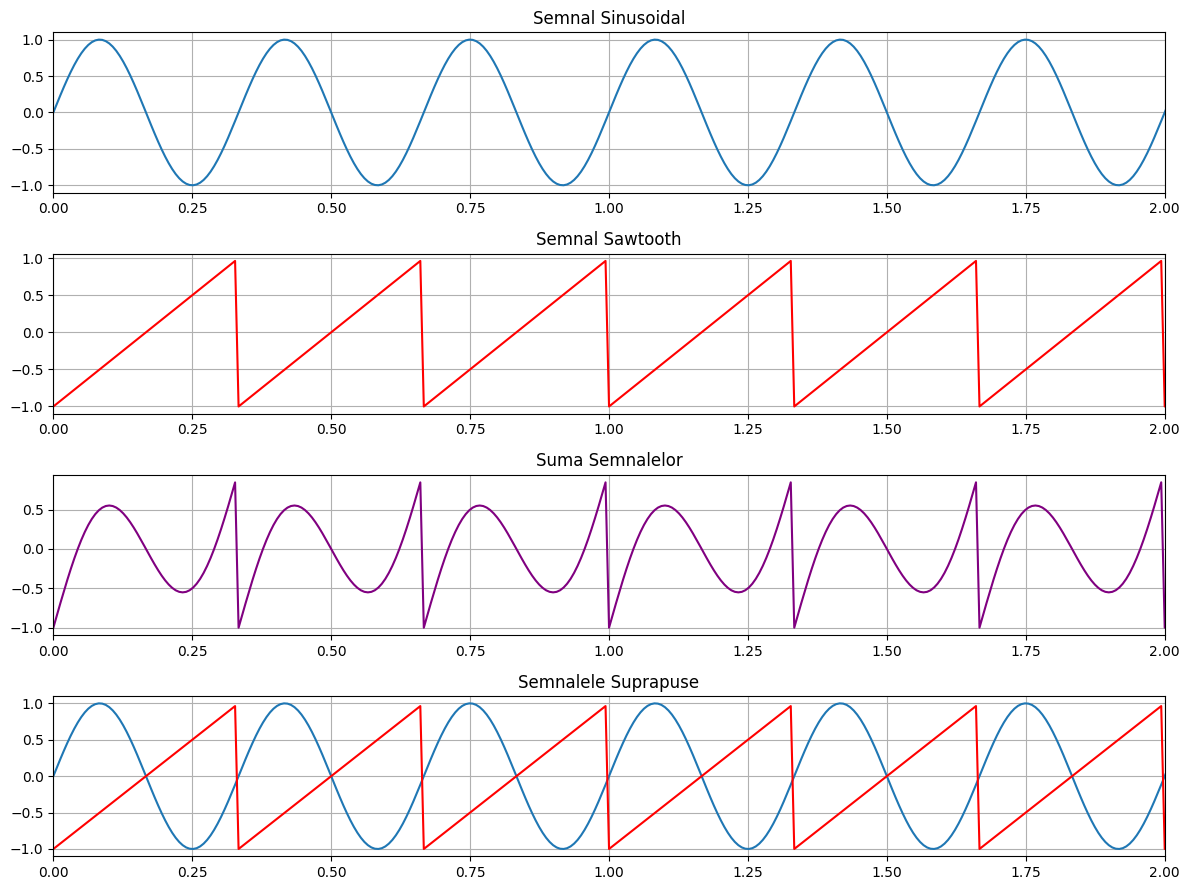

In [10]:
from scipy.signal import sawtooth

time_interval = np.linspace(0, 2*np.pi, 1000)   
frequency_sin = 3  
frequency_saw = 3  

sin_signal = np.sin(2 * np.pi * frequency_sin * time_interval)

saw_signal = sawtooth(2 * np.pi * frequency_saw * time_interval)

sum_signal = sin_signal + saw_signal

plt.figure(figsize=(12, 9))

plt.subplot(4, 1, 1)
plt.title("Semnal Sinusoidal")
plt.plot(time_interval, sin_signal)
plt.xlim([0, 2])
plt.grid(True)

plt.subplot(4, 1, 2)
plt.title("Semnal Sawtooth")
plt.plot(time_interval, saw_signal, color="red")
plt.xlim([0, 2])
plt.grid(True)

plt.subplot(4, 1, 3)
plt.title("Suma Semnalelor")
plt.plot(time_interval, sum_signal, color="purple")
plt.xlim([0, 2])
plt.grid(True)

plt.subplot(4, 1, 4)
plt.title("Semnalele Suprapuse")
plt.plot(time_interval, sin_signal)
plt.plot(time_interval, saw_signal, color="red")
#plt.plot(time_interval, sum_signal)
plt.xlim([0, 2])
plt.grid(True)

plt.tight_layout()
plt.show()


## Exercițiul 4

Generați două semnale cu aceeași formă de undă, dar de frecvențe diferite, și concatenați-le (puneți-le unul după celălalt în același vector). Redați audio rezultatul și notați ce observați.

**Observație:** Intervalul de frecvențe pe care îl poate percepe urechea umană este aproximativ 40&ndash;20000 Hz. Semnalele voastre ar trebui să aibă frecvențele fundamentale în acest interval dacă vreți să le puteți auzi. Frecvența de eșantionare ar trebui să fie 44100 Hz.

In [27]:
fs = 44100  # 44.1 kHz
duration = 1.0  # 1 secunda

t = np.linspace(0, duration, int(fs * duration), endpoint=False)

freq1 = 440  # 440 Hz  
freq2 = 880  # 880 Hz 

signal1 = 0.5 * np.sin(2 * np.pi * freq1 * t)
signal2 = 0.5 * np.sin(2 * np.pi * freq2 * t)

concatenated_signal = np.concatenate([signal1, signal2])



# plt.subplot(3, 1, 1)
# plt.title("Signal 1")
# plt.plot(t, signal1, color="red")
# plt.grid(True)

# plt.subplot(3, 1, 2)
# plt.title("Signal 2")
# plt.plot(t, signal1, color="blue")
# plt.grid(True)

# plt.subplot(3, 1, 3)
# plt.title("Concated Signals")
# plt.plot(t, signal1, color="purple")
# plt.grid(True)

sd.play(concatenated_signal, samplerate=fs)
sd.wait()


# In cadrul redarii audio a celor 2 semnale am putut distinge 2 tonuri diferite, unul mai grav/jos si unul mai acut/inalt,
# cred ca frecventa aleasa a jucat un rol important 


## Exercițiul 5

Generați un semnal sinusoidal de frecvență 200 Hz, eșantionat la o frecvență de 400 Hz pe un interval de timp ales de voi (dar suficient de mic cât să puteți distinge oscilațiile). Decimați-l la 1/4 din frecvența inițială (păstrați doar al 4-lea fiecare element din vector).

1. Afișați grafic semnalul inițial și cel decimat și comentați diferențele.

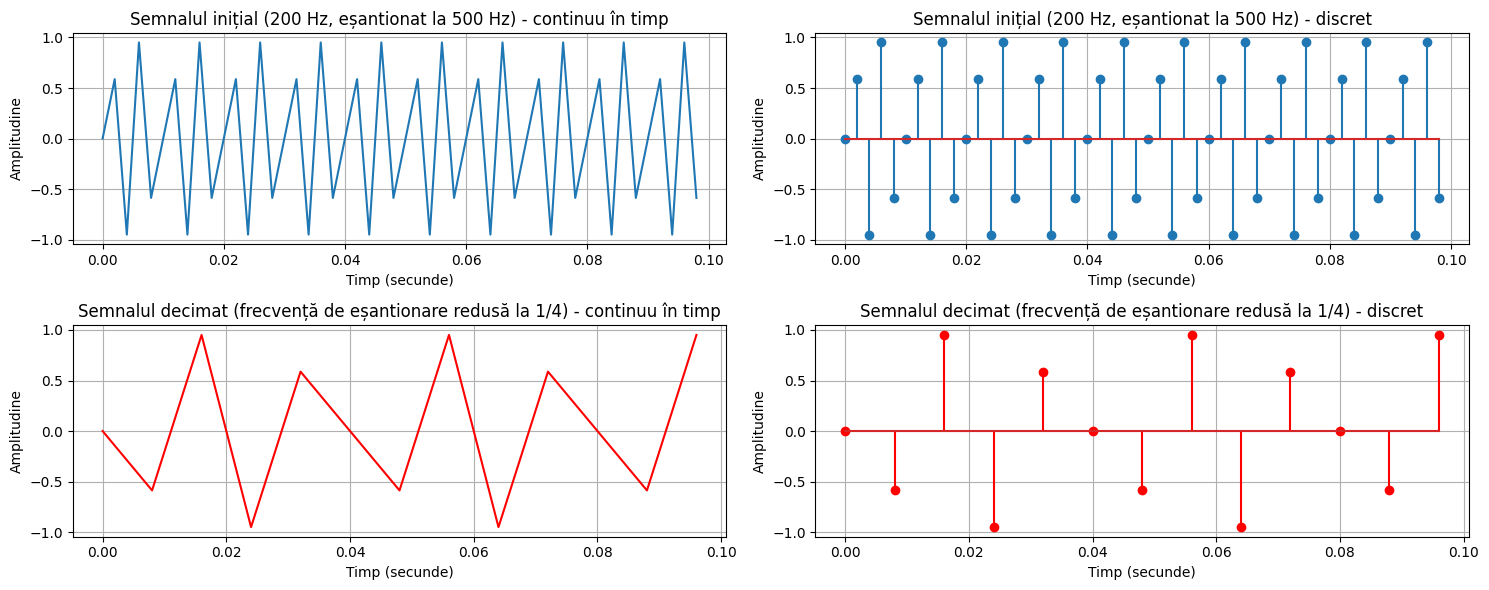

In [12]:

# am modificat la 500 de Hz pentru a observa mai bine 
fs_original = 500  # frecventa de esantionare
f_signal = 200  # frecventa semnalului

duration = 0.1  # 100 ms

t_original = np.linspace(0, duration, int(fs_original * duration), endpoint=False)

signal_original = np.sin(2 * np.pi * f_signal * t_original)


# pastram al 4 lea esantion din 400
signal_decimated = signal_original[::4]
t_decimated = t_original[::4]

plt.figure(figsize=(15, 6))

plt.subplot(4, 2, 1)
plt.title('Semnalul inițial (200 Hz, eșantionat la 500 Hz) - continuu în timp')
plt.xlabel('Timp (secunde)')
plt.ylabel('Amplitudine')
plt.plot(t_original, signal_original)
plt.grid(True)


plt.subplot(4,2, 2)
plt.title('Semnalul inițial (200 Hz, eșantionat la 500 Hz) - discret')
plt.xlabel('Timp (secunde)')
plt.ylabel('Amplitudine')
plt.stem(t_original, signal_original)
plt.grid(True)

plt.subplot(4,2,3)
plt.title('Semnalul decimat (frecvență de eșantionare redusă la 1/4) - continuu în timp')
plt.xlabel('Timp (secunde)')
plt.ylabel('Amplitudine')
plt.plot(t_decimated, signal_decimated, 'r')
plt.grid(True)

plt.subplot(4,2, 4)
plt.title('Semnalul decimat (frecvență de eșantionare redusă la 1/4) - discret')
plt.xlabel('Timp (secunde)')
plt.ylabel('Amplitudine')
plt.stem(t_decimated, signal_decimated, 'r')
plt.grid(True)

plt.tight_layout()
plt.show()

# pe reprezentarea grafica discreta putem considera ca semnalul este asemanator, dar 
# in reprezentarea continua vedem ca semnalul este complet diferit
# un motiv pentru care am putea alege mai putine esantione este de a reduce memoria necesara, dar la fel si calitatea va scadea




2. Repetați decimarea (tot la 1/4 din frecvența inițială) pornind acum de la al doilea sau de la al treilea element din vector. Ce observați? Este decimarea invariantă în timp?

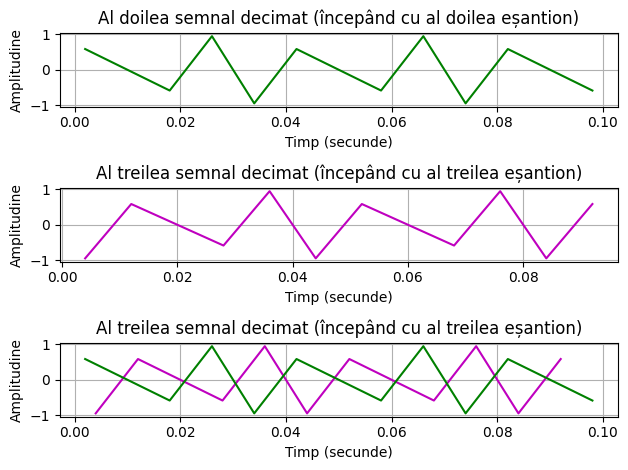

In [21]:
signal_decimated_2nd = signal_original[1::4]
signal_decimated_3rd = signal_original[2::4]

t_decimated_2nd = t_original[1::4]
t_decimated_3rd = t_original[2::4]

plt.subplot(3,1, 1)
plt.title('Al doilea semnal decimat (începând cu al doilea eșantion)')
plt.xlabel('Timp (secunde)')
plt.ylabel('Amplitudine')
plt.plot(t_decimated_2nd, signal_decimated_2nd, 'g')
plt.grid(True)

plt.subplot(3,1,2)
plt.title('Al treilea semnal decimat (începând cu al treilea eșantion)')
plt.xlabel('Timp (secunde)')
plt.ylabel('Amplitudine')
plt.plot(t_decimated_3rd, signal_decimated_3rd, 'm')
plt.grid(True)


plt.subplot(3,1,3)
plt.title('Al treilea semnal decimat (începând cu al treilea eșantion)')
plt.xlabel('Timp (secunde)')
plt.ylabel('Amplitudine')
plt.plot(t_decimated_3rd, signal_decimated_3rd, 'm')
plt.plot(t_decimated_2nd, signal_decimated_2nd, 'g')
plt.grid(True)


plt.tight_layout()
plt.show()

## Exercițiul 6

În practică se operează des cu următoarea aproximare: pentru valori mici ale lui $\alpha$, $\sin(\alpha) \approx \alpha$. Verificați dacă această aproximare este bună, reprezentând grafic cele două curbe ($f (x) = x$
și $f (x) = \sin(x)$) pentru valori în intervalul $[-\pi/2, \pi/2]$.

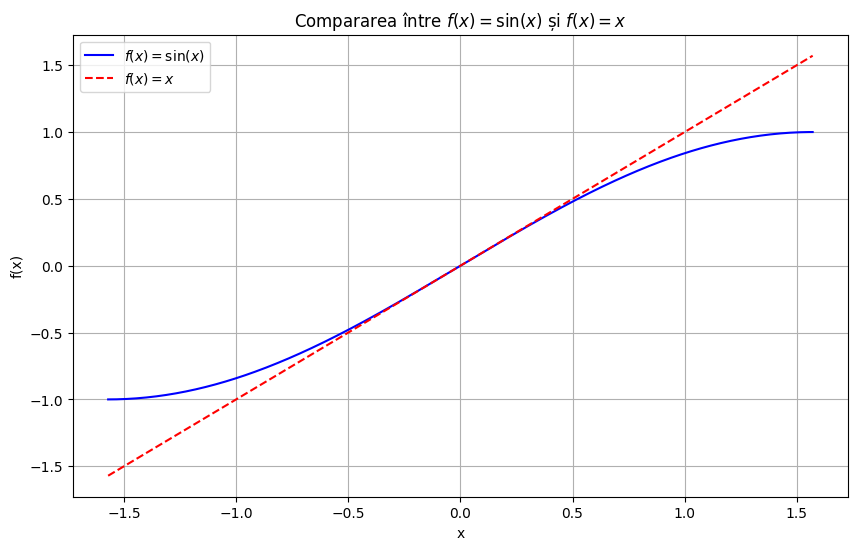

In [23]:

# axa ox
x_values = np.linspace(-np.pi/2, np.pi/2, 500)
# maparea valorilor
y_sin = np.sin(x_values)

#putem sa comparam direct cu axa ox 
y_approx = x_values

plt.figure(figsize=(10, 6))
plt.title("Compararea între $f(x) = \\sin(x)$ și $f(x) = x$")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x_values, y_sin, label='$f(x) = \\sin(x)$', color='blue')

plt.plot(x_values, y_approx, label='$f(x) = x$', linestyle='--', color='red')

plt.grid(True)
plt.legend()

# dupa cum putem observa pe valori mici si pe un de marime redusa valorile sunt asemanatoare
